In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [4]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

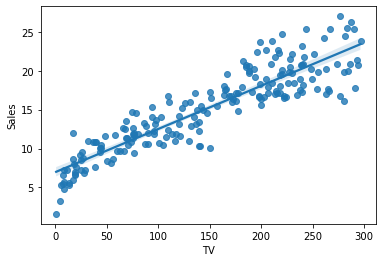

In [8]:
#Visualize
sns.regplot(x='TV', y='Sales', data=advertising)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

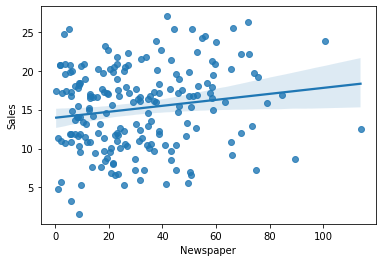

In [9]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

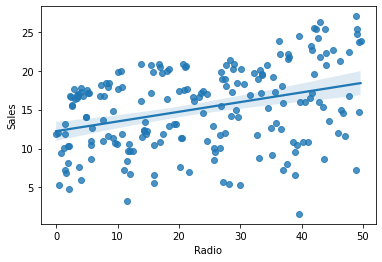

In [10]:
sns.regplot(x='Radio', y='Sales', data=advertising)

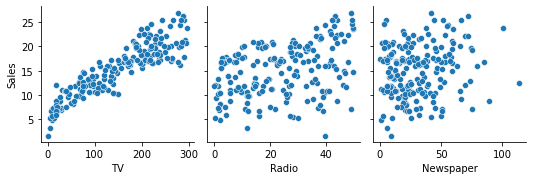

In [11]:
sns.pairplot(x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], data=advertising)

<AxesSubplot:>

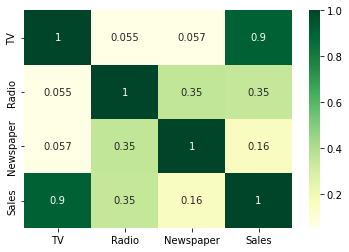

In [22]:
sns.heatmap(advertising.corr(), annot=True, cmap='YlGn')

In [25]:
#Create X and Y
X = advertising['TV']
y = advertising['Sales']

In [26]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [30]:
#Train the model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [31]:
#fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [32]:
#Sales = 6.94 + 0.05.TV

In [34]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.52e-52
Time:                        18:41:14   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
lr_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.814   
Dependent Variable: Sales            AIC:                646.2492
Date:               2022-09-04 18:41 BIC:                652.1325
No. Observations:   140              Log-Likelihood:     -321.12 
Df Model:           1                F-statistic:        611.2   
Df Residuals:       138              Prob (F-statistic): 1.52e-52
R-squared:          0.816            Scale:              5.8358  
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    6.9487      0.3846    18.0682    0.0000    6.1883    7.7091
TV       0.0545      0.0022    24.7216    0.0000    0.0502    0.0589
-----------------------------------------------------------------
Omnibus:               0.027        Durbin-Watson:          2.196
Prob(Omnibus):         0.987        Jarque-Bera (JB):       0.150
Skew:                  -0.006       Prob(JB):               0.928
Kurtosis:              2.840        Condition No.:          328  
=================================================================

"""

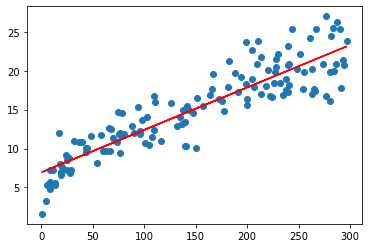

In [43]:
#Visualize Prediction
plt.scatter(X_train, y_train)
plt.plot(X_train, lr_model.predict(X_train_sm), 'r')

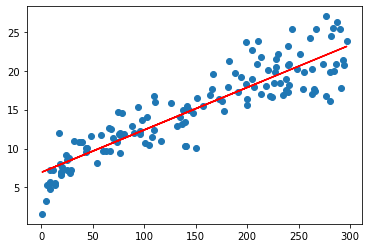

In [44]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948683+0.054546*X_train, 'r')

In [55]:
#Residual Analysis
#error = f(y_train, y_train_pred)
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - lr_model.predict(X_train_sm)

C:\Users\Rakesh Panigrahy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual Plot')

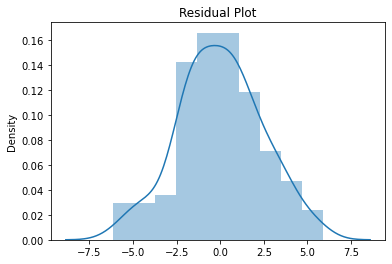

In [47]:
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

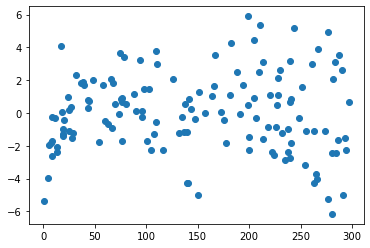

In [48]:
#look for patterns in residuals (we should not be able to identify)
plt.scatter(X_train, res)
plt.show()

In [49]:
#Prediction and Evaluation on Test Set

In [50]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)

In [53]:
#Test R2
r2 = r2_score(y_test, y_test_pred)
r2

0.7921031601245658

In [57]:
#Train R2
r2 = r2_score(y_train, y_train_pred)
r2

0.8157933136480389

In [58]:
#Mean Square Error
mean_squared_error(y_test, y_test_pred)

4.077556371826956

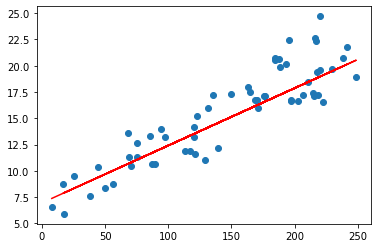

In [60]:
#Visualize Prediction
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

In [76]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)
X_train_lm.shape

(140, 1)

In [72]:
#Liner Regression Using sklearn
#1. Create an object
lm = LinearRegression()
#2. Fit the model
lm.fit(X_train_lm, y_train)

LinearRegression()

In [73]:
help(lm)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [78]:
#3. See the params
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.9486832000013585


In [77]:
#Make Prediction
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [79]:
#4. Evauluate
#Test R2
r2 = r2_score(y_test, y_test_pred)
r2

0.792103160124566

In [80]:
#Train R2
r2 = r2_score(y_train, y_train_pred)
r2

0.8157933136480388